In [1]:
import json
import glob
import os
from pathlib import Path
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from IPython.display import display
from pprint import pprint
from modules.data_preprocessing.emotion3d_preprocessor import (
    Emotion3DPreprocessor,
    annotation_template
)

In [2]:
!ls '/root/synthetic_cabin_1m/syntheticcabin_1mil/'

SyntheticCabin_1m  processed_syntheticCabin_1m


In [3]:
# data_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil')
raw_data_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/SyntheticCabin_1m/')
data_root_path = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
# with open('/root/synthetic_cabin_1m/') as f:
    

In [4]:
# (data_root_path / 'annotations').iterdir()
with (data_root_path / 'annotations/person_keypoints_train.json').open() as f:
    obj = json.loads(f.read())

In [5]:
obj['images'][0]

{'license': 1,
 'file_name': '000000259376.jpg',
 'coco_url': '',
 'height': 1024,
 'width': 1280,
 'data_captured': '2021-06-22',
 'flickr_url': '',
 'id': 259376}

In [6]:
annotation_info = {}
for item in obj['annotations']:
    annotation_info[item['image_id']] = item

image_info = {}
for item in obj['images']:
    image_info[item['id']] = item

In [7]:
def get_bbox(filename):
    img = cv2.imread(filename)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 75, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        x,y,w,h = cv2.boundingRect(np.vstack(contours))
        return x, y, w, h
    else:
        return 0, 0, 0, 0

get bbox (604, 540, 604, 540)
bbox [604.0, 540.0, 604.0, 540.0]


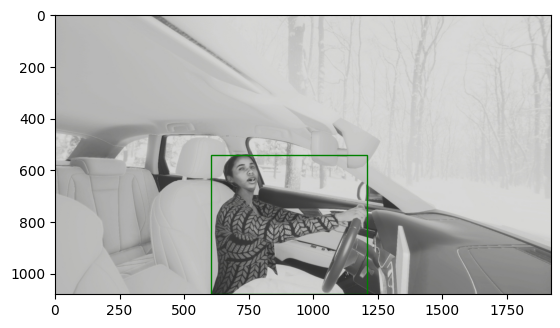

In [8]:
fig, ax = plt.subplots()

img_id = 292817
img_path = (data_root_path / 'images' / 'train' / image_info[img_id]['file_name']).as_posix()
mask_img_path = (raw_data_path / 'masks' / f'mask_{img_id}.png').as_posix()
bbox = get_bbox(mask_img_path)
print('get bbox', bbox)
img = plt.imread(img_path)
# ax.imshow(img)
ax.imshow(img)
# pprint(annotation_info[img_id])
bbox = annotation_info[img_id]['bbox']
print('bbox', bbox)
x1, y1, x2, y2 = bbox
# w = x2-x1
# h = y2-y1
w = x2
h = y2
rect = patches.Rectangle(
    (x1, y1), w, h, linewidth=1, edgecolor='g', facecolor='none', label='high bbox'
)
ax.add_patch(rect)
